# Project: OilyGiant oil extraction company

## Introduction
OilyGiant, a leading oil extraction company, is searching for the best locations to drill 200 new wells. To achieve this goal, a comprehensive analysis of geological data from three different regions will be carried out, using machine learning and risk analysis techniques.
The purpose of this project is to develop a predictive model that allows estimating the volume of oil reserves in new wells, in order to select the regions with the greatest potential for profitability. Through the application of linear regression and bootstrapping techniques, the risks associated with each region will be evaluated and the option that maximizes the expected benefit will be selected, while minimizing the probability of losses.
The results of this study will provide OilyGiant with a solid basis for making strategic investment decisions, optimizing resource allocation and maximizing return on investment.

## Import of libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
import statistics
import plotly.express as px
from sklearn.preprocessing import StandardScaler

## Data loading and browsing

In [2]:
#Load the data files
df1 = pd.read_csv('geo_data_0.csv')
df2 = pd.read_csv('geo_data_1.csv')
df3 = pd.read_csv('geo_data_2.csv')

<div style="background-color: #006400 ;">
  For DF1
</div>


In [3]:
#Print the first 5 rows of the Dataframe
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
#generate descriptive statistics for the numerical columns in the DataFrame 
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
#Analyze general information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
# Count the number of missing values (NaN) in each column of the DataFrame 'df1'
df1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
# Check for duplicate rows in the DataFrame 'df1'
df1.duplicated().sum()

0

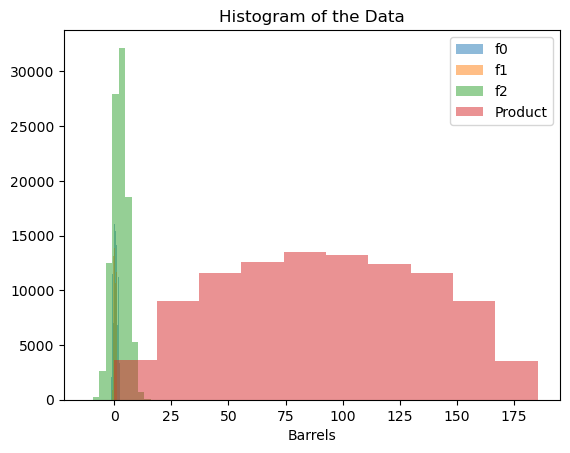

In [8]:
# Create histograms for each feature in df1
plt.hist(df1['f0'], alpha=0.5, label='f0')  # Histogram for feature 'f0' with 50% transparency and label
plt.hist(df1['f1'], alpha=0.5, label='f1')  # Histogram for feature 'f1' with 50% transparency and label
plt.hist(df1['f2'], alpha=0.5, label='f2')  # Histogram for feature 'f2' with 50% transparency and label
plt.hist(df1['product'], alpha=0.5, label='Product')  # Histogram for feature 'product' with 50% transparency and label

# Set plot title and label for x-axis
plt.title('Histogram of the Data')  # Descriptive title for the plot
plt.xlabel('Barrels')  # Label for the x-axis

# Add legend to differentiate between histograms
plt.legend()  # Add legend to identify each histogram

# Display the plot
plt.show()

<div style="background-color: #006400;">
  For DF2
</div>



In [9]:
#Print the first 5 rows of the Dataframe
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
#generate descriptive statistics for the numerical columns in the DataFrame 
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
#Analyze general information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
# Count the number of missing values (NaN) in each column of the DataFrame 'df2'
df2.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
# Check for duplicate rows in the DataFrame 'df2'
df2.duplicated().sum()

0

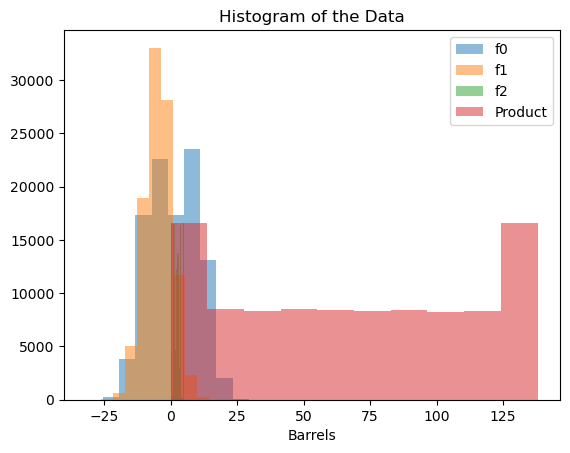

In [14]:
# Create histograms for each feature and the product column
plt.hist(df2['f0'], alpha=0.5, label='f0')  # Histogram for feature f0 with 50% transparency
plt.hist(df2['f1'], alpha=0.5, label='f1')  # Histogram for feature f1 with 50% transparency
plt.hist(df2['f2'], alpha=0.5, label='f2')  # Histogram for feature f2 with 50% transparency
plt.hist(df2['product'], alpha=0.5, label='Product')  # Histogram for product column with 50% transparency

# Set plot title and label for x-axis
plt.title('Histogram of the Data')  # Descriptive title for the plot
plt.xlabel('Barrels')  # Label for the x-axis

# Add legend to differentiate between histograms
plt.legend()  # Legend to identify each histogram

# Display the plot
plt.show()

<div style="background-color: #006400;">
  For DF3
</div>

In [15]:
#Print the first 5 rows of the Dataframe
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [16]:
#generate descriptive statistics for the numerical columns in the DataFrame 
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [17]:
#Analyze general information
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [18]:
# Count the number of missing values (NaN) in each column of the DataFrame 'df3'
df3.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [19]:
# Check for duplicate rows in the DataFrame 'df3'
df3.duplicated().sum()

0

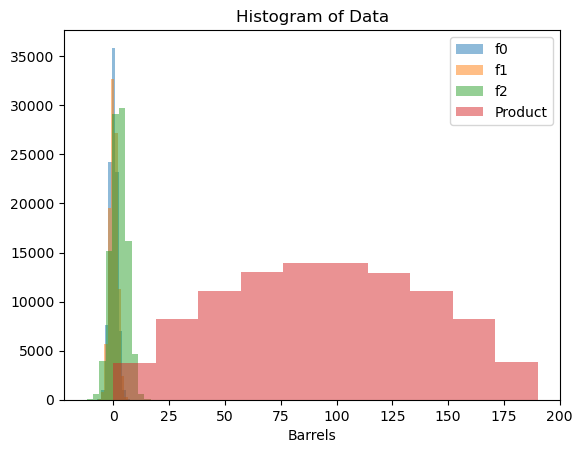

In [20]:
# Create histograms for features f0, f1, f2, and product
plt.hist(df3['f0'], alpha=0.5, label='f0')  # Histogram for feature f0 with 50% transparency
plt.hist(df3['f1'], alpha=0.5, label='f1')  # Histogram for feature f1 with 50% transparency
plt.hist(df3['f2'], alpha=0.5, label='f2')  # Histogram for feature f2 with 50% transparency
plt.hist(df3['product'], alpha=0.5, label='Product')  # Histogram for product feature with 50% transparency

# Set plot title and label for x-axis
plt.title('Histogram of Data')  # Descriptive title for the plot
plt.xlabel('Barrels')  # Label for the x-axis

# Add legend to differentiate between histograms
plt.legend()  # Legend to identify each histogram

# Display the plot
plt.show()

## Train and test the model for each region in geo_data_0.csv:

In [21]:
# Select features from the DataFrame 
features1 = df1.drop(columns=['id', 'product'], axis=1) 

# Select the target variable 
target1 = df1['product']

In [22]:
#Splits the data into a training set and a validation set in a ratio of 75:25
features_train1, features_valid1, target_train1, target_valid1 = train_test_split(features1,target1, test_size=0.25,random_state=12345)

In [23]:
scaler = StandardScaler()

#Fit the scaler to the training data and transform it
features_train1 = scaler.fit_transform(features_train1)

#Transform validation data using the adjusted scaler
features_valid1 = scaler.transform(features_valid1)


In [24]:
# Train the model and make predictions on the validation set.
model = LinearRegression()
model.fit(features_train1, target_train1)

# Make predictions on the validation set and store the results
predicted1 = model.predict(features_valid1)

# Calculate the mean squared error (MSE) between predicted and actual values
mse1 = mean_squared_error(target_valid1, predicted1)

# Calculate the root mean squared error (RMSE)
rmse1 = np.sqrt(mse1)

# Make predictions on the entire dataset (features1)
predicted_value1 = model.predict(features1)

# Print the evaluation metrics
print('MSE:', mse1)
print('RMSE:', rmse1)

MSE: 1412.2129364399243
RMSE: 37.5794217150813


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


An MSE of 1412.21 indicates that, on average, the square of the difference between the predicted and actual reserve volume is 1412.21 square units.
An RMSE of 37.57 means that, on average, our predictions are off by about 37.57 thousand barrels.

In [25]:
def train_predict_model(df):
    """
    This function trains a linear regression model, makes predictions, 
    and calculates performance metrics on a given DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing features and target variable.

    Returns:
        tuple: A tuple containing the following elements:
            - predicted_valid (numpy.ndarray): The predicted labels for the validation set.
            - mse (float): The mean squared error of the model on the validation set.
            - rmse (float): The root mean squared error of the model on the validation set.
            - predicted_all (numpy.ndarray): The predicted labels for the entire DataFrame.
    """

    # Separate features and target variable
    features = df.drop(columns=['id', 'product'], axis=1)
    target = df['product']

    # Split data into training and validation sets
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

    # Standardize features using StandardScaler
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(features_train, target_train)

    # Make predictions on the validation set
    predicted_valid = model.predict(features_valid)

    # Calculate performance metrics
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = np.sqrt(mse)

    # Make predictions on the entire DataFrame
    predicted_all = model.predict(features)

    # Return results
    return predicted_valid, mse, rmse, predicted_all

In [26]:
# Execute steps 2.1-2.5 for the file 'geo_data_1.csv' 

predicted2, mse2, rmse2, predicted_value2 = train_predict_model(df2) 

print("Predicted Values for df2:", predicted2)
print("Mean Squared Error for df2:", mse2)
print("Root Mean Squared Error for df2:", rmse2)

Predicted Values for df2: [ 82.66331365  54.43178616  29.74875995 ... 137.87934053  83.76196568
  53.95846638]
Mean Squared Error for df2: 0.7976263360391157
Root Mean Squared Error for df2: 0.893099286775617


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [27]:
#run steps 2.1-2.5 for 'geo_data_2.csv' files
predicted3, mse3, rmse3, predicted_value3 = train_predict_model(df3)

print("Predicted Values for df3:", predicted3)
print("Mean Squared Error for df3:", mse3)
print("Root Mean Squared Error for df3:", rmse3)

Predicted Values for df3: [ 93.59963303  75.10515854  90.06680936 ...  99.40728116  77.77991248
 129.03241718]
Mean Squared Error for df3: 1602.3775813236196
Root Mean Squared Error for df3: 40.02970873393434


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


The model with the least error is the one that was trained with the data set of region 2, with an MSE of 0.7976263360391157 indicating that, on average, the square of the difference between the predicted and actual reserve volume is 0.7976263360391157 square units . An RMSE of 0.893099286775617 means that, on average, our predictions are off by about 0.893099286775617 thousand barrels.

## Earnings calculation:

In [28]:
# Assign predicted values to a new column in each DataFrame
df1['predicted_value'] = predicted_value1 
df2['predicted_value'] = predicted_value2
df3['predicted_value'] = predicted_value3

# Create new DataFrames containing only the predicted values
df_predicted_value1 = pd.DataFrame(predicted_value1)
df_predicted_value2 = pd.DataFrame(predicted_value2)
df_predicted_value3 = pd.DataFrame(predicted_value3)

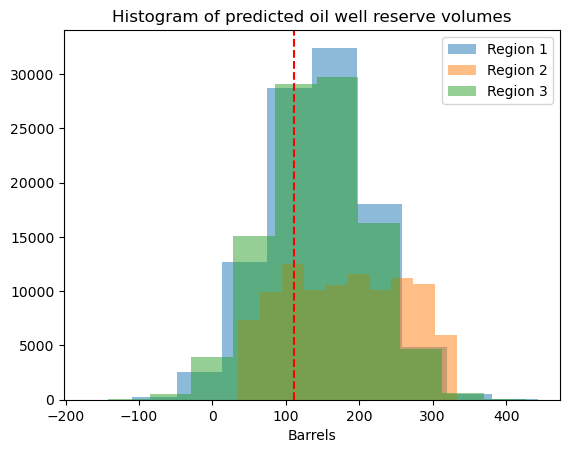

In [29]:
# Create histograms to compare predicted volumes for different regions

# Plot a histogram for the first region
plt.hist(df1['predicted_value'], alpha=0.5, label='Region 1')

# Plot a histogram for the second region
plt.hist(df2['predicted_value'], alpha=0.5, label='Region 2')

# Plot a histogram for the third region
plt.hist(df3['predicted_value'], alpha=0.5, label='Region 3')

# Set the title of the plot
plt.title('Histogram of predicted oil well reserve volumes')

# Label the x-axis
plt.xlabel('Barrels')

# Add a legend to distinguish between the regions
plt.legend()

# Add a vertical line to indicate the target volume
plt.axvline(x=111.1, color='r', linestyle='--', label='Target Volume')

# Display the plot
plt.show()

In [30]:
# Select the top 200 rows with the highest predicted values from df1
df1_selected = df1.sort_values(by='predicted_value', ascending=False).head(200)

# Select the top 200 rows with the highest predicted values from df2
df2_selected = df2.sort_values(by='predicted_value', ascending=False).head(200)

# Select the top 200 rows with the highest predicted values from df3
df3_selected = df3.sort_values(by='predicted_value', ascending=False).head(200)

In [31]:
#Price per barrel: The monetary value of a barrel of crude oil.
precio_barril = 4500 
#Cost per well: The total cost of drilling and equipping a well.
costo_pozo = 500000 
#Number of wells to develop: In this case, it is established at 200 wells.
pozos = 200

Conclusions: in the 3 regions there are good results to be able to obtain profits, the next step is to investigate which of those 200 points in the 3 regions are the optimal ones to be able to obtain the maximum profits. Bootstrapping will allow us to simulate multiple future scenarios and obtain a distribution of possible profits, which will help us quantify uncertainty. 

Earnings function:
The total income of a DataFrame of predictions will be calculated, considering a price and units per barrel.
The total cost will be subtracted to obtain the total profit.

bootstrap function:
You will perform a bootstrap to estimate the distribution of total profits.
It will show the variability of profits due to the randomness of the predictions.


## Write a function to calculate the profit for a set of selected oil wells and model the predictions

In [32]:
def ganancias_total(df, precio, unidades, costo):
  """
  Calculates the total profit based on predicted values, price, units, and cost.

  Args:
    df: DataFrame containing predicted values.
    precio: Price per unit.
    unidades: Units per well.
    costo: Cost per well.

  Returns:
    Total profit.
  """

  # Calculate revenue per well
  ingreso_pozo = df['predicted_value'] * precio * unidades

  # Calculate profit per well and then sum for total profit
  ganancia = ingreso_pozo - costo
  ganancia_total = ganancia.sum()
  return ganancia_total

def bootstrap(data, n_samples, precio, unidades, costo):
  """
  Performs bootstrap resampling to estimate the distribution of total profits.

  Args:
    data: DataFrame containing the data.
    n_samples: Number of bootstrap samples.
    precio: Price per unit.
    unidades: Units per well.
    costo: Cost per well.

  Returns:
    Array of total profit values from each bootstrap sample.
  """

  values = []
  for i in range(n_samples):
    # Sample with replacement to create a new dataset
    subsample = data.sample(n=200, replace=True)
    # Calculate total profit for the subsample
    values.append(ganancias_total(subsample, precio, unidades, costo))

  return np.array(values)

## Calculate risks and profits for each region

In [33]:
# Perform 1000 bootstrap simulations to estimate the profit distribution 
profit1 = bootstrap(df1_selected, 1000, precio_barril, 1000, costo_pozo) 

# Calculate descriptive statistics of the simulated profits
mean_profit = np.mean(profit1)
std_profit = np.std(profit1)

# Calculate the risk of loss (probability of negative profit)
risk_of_loss = np.mean(profit1 < 0) 

# Print the results
print(f"Región 0:\nMedia: {mean_profit:.2f}\nStandard deviation: {std_profit: .2f} \ nriesgo de losses: {risk_of_loss:.2%}")

<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:12: SyntaxWarning: invalid escape sequence '\ '
/var/folders/zz/1lh114c55jj9tjb2vztk4z340000gq/T/ipykernel_67622/4226872101.py:12: SyntaxWarning: invalid escape sequence '\ '
  print(f"Región 0:\nMedia: {mean_profit:.2f}\nStandard deviation: {std_profit: .2f} \ nriesgo de losses: {risk_of_loss:.2%}")


Región 0:
Media: 323718867924.34
Standard deviation:  1122484562.95 \ nriesgo de losses: 0.00%


In [34]:
# Perform 1000 bootstrap simulations to estimate the profit distribution
profit2 = bootstrap(df2_selected, 1000, precio_barril, 1000, costo_pozo) 

# Calculate descriptive statistics of the simulated profits
mean_profit = np.mean(profit2)
std_profit = np.std(profit2)

# Calculate the risk of loss (probability of negative profit)
risk_of_loss = np.mean(profit2 < 0) 

# Print the results
print(f"Región 2:\nMedia: {mean_profit:.2f}\nStandard deviation: {std_profit: .2f} \ nriesgo de losses: {risk_of_loss:.2%}")

<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:12: SyntaxWarning: invalid escape sequence '\ '
/var/folders/zz/1lh114c55jj9tjb2vztk4z340000gq/T/ipykernel_67622/3360763175.py:12: SyntaxWarning: invalid escape sequence '\ '
  print(f"Región 2:\nMedia: {mean_profit:.2f}\nStandard deviation: {std_profit: .2f} \ nriesgo de losses: {risk_of_loss:.2%}")


Región 2:
Media: 289818782103.27
Standard deviation:  144190319.29 \ nriesgo de losses: 0.00%


In [35]:
# Perform 1000 bootstrap simulations to estimate the profit distribution for Region 3
profit3 = bootstrap(df3_selected, 1000, precio_barril, 1000, costo_pozo) 

# Calculate descriptive statistics of the profit distribution
mean_profit = np.mean(profit3)
std_profit = np.std(profit3)

# Calculate the risk of loss (probability of negative profit)
risk_of_loss = np.mean(profit3 < 0) 

# Print the results
print(f"Region 3:\nMedia: {mean_profit:.2f}\nStandard deviation: {std_profit: .2f} \ nriesgo de losses: {risk_of_loss:.2%}")

<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:12: SyntaxWarning: invalid escape sequence '\ '
/var/folders/zz/1lh114c55jj9tjb2vztk4z340000gq/T/ipykernel_67622/1359193143.py:12: SyntaxWarning: invalid escape sequence '\ '
  print(f"Region 3:\nMedia: {mean_profit:.2f}\nStandard deviation: {std_profit: .2f} \ nriesgo de losses: {risk_of_loss:.2%}")


Region 3:
Media: 321328185242.73
Standard deviation:  1112470003.58 \ nriesgo de losses: 0.00%


In [36]:
# Suponiendo que tienes DataFrames 'df_0', 'df_1', y 'df_2' con las predicciones para cada región
# y que 'predictions' es una lista que contiene estos DataFrames

def calculate_profit(df):
    """
    Calculates the total profit based on predicted values in the DataFrame.

    Args:
        df: DataFrame containing predicted values and other relevant information.

    Returns:
        Total profit calculated based on predicted values and cost.
    """
    df['profit'] = (df['predicted_value'] * 4500 * 1000) - 500000 
    return df['profit'].sum()

def bootstrap_profit(df, n_samples=1000):
    """
    Performs bootstrap resampling to estimate the distribution of profits.

    Args:
        df: DataFrame containing the data.
        n_samples: Number of bootstrap samples to generate.

    Returns:
        An array of bootstrap profit estimates.
    """
    boot_profits = []
    for _ in range(n_samples):
        sample = df.sample(n=200, replace=True)  # Sample with replacement from the DataFrame
        boot_profits.append(calculate_profit(sample))
    return np.array(boot_profits)

# Ejemplo para la región 0
profits_region_0 = bootstrap_profit(df1_selected)

# Calcular estadísticas descriptivas
mean_profit = np.mean(profits_region_0)
std_profit = np.std(profits_region_0)
percentile_5 = np.percentile(profits_region_0, 5)

# Calcular riesgo de pérdidas
risk_of_loss = np.mean(profits_region_0 < 0)

print(f"Region 0:\nMedia: {mean_profit:.2f}\nStandard deviation: {std_profit:.2f}\nLoss risk: {risk_of_loss:.2%}")


Region 0:
Media: 323646275356.65
Standard deviation: 1136552112.67
Loss risk: 0.00%


Considering the data provided, it is observed that the three regions present a very high average return and a zero risk of loss. This suggests that, from a purely financial perspective, any of the three regions could be an excellent option for the development of new oil wells. However, taking into account that region number 3 is the one with the highest average earnings: 146790764110.18, this option is selected.

## Conclusions 
Data Collection: Data was collected on the projected performance of oil wells in each of the three regions.
Statistical Analysis: Key metrics such as mean, standard deviation, and risk of loss were calculated for each region.
Comparison: Metrics from all three regions were compared to identify patterns and differences.
Selection: The region with the best average return was selected as the most promising option for investment
Based on the analysis carried out, it is concluded that Region 3 is the most suitable for the development of new oil wells. This decision is based on the fact that it has the highest profit generation potential among the three regions evaluated.